In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df_registry = pd.read_csv("../data/clean_registry.csv")
df_cases = pd.read_csv("../data/clean_cases.csv")
df_pop = pd.read_csv("../data/clean_pop.csv")

In [44]:
def df_by_registry(df):
    '''
    aggregate data by registry and remove not important columns
    '''
    df_new = df.groupby('REGISTRY').sum().iloc[:,2:].reset_index()
    return df_new
    
def annualize_case_data(df_cases):
    '''
    annualze data by dividing by 5 as we have 5 years of data
    '''
    df_cases['TOTAL_CASES'] = df_cases['TOTAL'] / 5
    df_cases['N0_14'] = df_cases['N0_14'] / 5
    df_cases['N15_29'] = df_cases['N15_29'] / 5
    df_cases['N30_44'] = df_cases['N30_44'] / 5
    df_cases['N45_64'] = df_cases['N45_64'] / 5
    df_cases['N65'] = df_cases['N65'] / 5
    return df_cases

def annualize_pop_data(df_pop):
    '''
    annualze data by dividing by 5 as we have 5 years of data
    '''
    df_pop['TOTAL_POP'] = df_pop['TOTAL'] / 5
    df_pop['P0_14'] = df_pop['P0_14'] / 5
    df_pop['P15_29'] = df_pop['P15_29'] / 5
    df_pop['P30_44'] = df_pop['P30_44'] / 5
    df_pop['P45_64'] = df_pop['P45_64'] / 5
    df_pop['P65'] = df_pop['P65'] / 5
    return df_pop

def munge_cases(df_cases):
    df_cases_1 = df_by_registry(df_cases)
    df_cases_new = annualize_case_data(df_cases_1)
    return df_cases_new
    
def munge_pop(df_pop):
    df_pop_1 = df_by_registry(df_pop)
    df_pop_new = annualize_pop_data(df_pop_1)
    return df_pop_new

def combine_data(df_cases,df_pop,df_registry):
    df_cases_new = munge_cases(df_cases)
    df_pop_new = munge_pop(df_pop)
    df_pop_reg = df_pop_new.merge(df_registry, on = 'REGISTRY',suffixes=('', '_reg'))
    df_combo = df_pop_reg.merge(df_cases_new, on = 'REGISTRY',suffixes=('', '_cases'))
    return df_combo

In [45]:
df_combo = combine_data(df_cases,df_pop,df_registry)

In [46]:
df_combo.drop(['TOTAL','country_long','star','is_national','is_national_exists','is_subset','TOTAL_cases'],axis = 1, inplace = True)

In [49]:
df_combo_country = df_combo.groupby('country_name').sum().iloc[:,1:].reset_index()

In [50]:
df_combo_country['Incidence Per Capita'] = df_combo_country['TOTAL_CASES'] / df_combo_country['TOTAL_POP']

In [51]:
df_combo_country.head()

,country_name,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,N0_14,N15_29,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita
0,Algeria,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,73.2,150.2,389.0,900.6,793.4,2306.4,0.001996
1,Argentina,1363473.2,1362708.8,995826.8,955536.4,476624.2,5154169.4,505.8,1072.2,3325.0,14384.2,19659.6,38946.8,0.007556
2,Australia,4999918.4,5577377.0,5553157.8,6588836.2,3567685.4,26286974.8,2321.8,7039.8,26538.8,149071.2,240196.4,425168.0,0.016174
3,Austria,1242177.8,1570187.8,1820801.4,2260183.4,1474437.2,8367787.6,552.6,1666.8,6745.8,38611.2,69033.6,116610.0,0.013936
4,Bahrain,180708.6,161927.0,110782.4,92510.2,23760.8,569689.0,61.2,86.6,234.4,715.2,545.8,1643.2,0.002884


In [52]:
df_plot = df_combo_country[df_combo_country['country_name'].isin(['United States','Canada','United Kingdom','France','Italy','Russia','Poland','China','Japan','India','Nigeria'])]

Text(0.5, 1.0, 'Cancer Incidence p/Capita (2008-2012)')

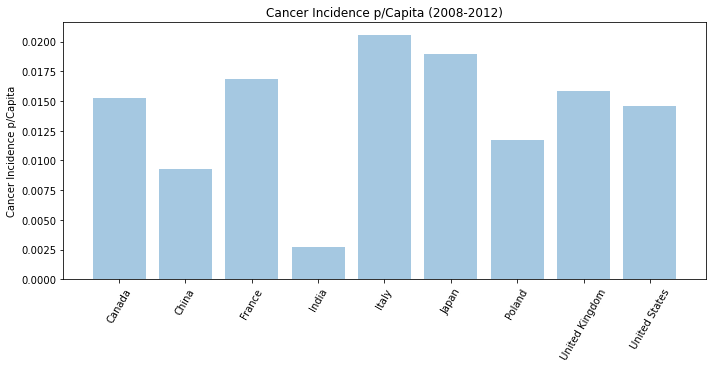

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(df_plot['country_name']))
y = df_plot['Incidence Per Capita']
ax.bar(x, y, alpha = 0.4)
ax.set_xticks(x)
ax.set_xticklabels(df_plot['country_name'],rotation = 60,)
ax.set_ylabel('Cancer Incidence p/Capita')
fig.tight_layout()
ax.set_title('Cancer Incidence p/Capita (2008-2012)')